In [35]:
import sys
sys.path.append('../src/')

from preprocessing import filter_rare_genes, normalize_by_library_size, filter_high_mito_cells, log_transform, filter_low_variance_and_mean_genes

In [36]:
from data_loading import load_10x_data

DATA_PATH = '../data/'

# Load raw 10x counts
raw_data = load_10x_data(DATA_PATH)

raw_data.shape

(5000, 33538)

In [39]:
from apoptosis_genes import APOPTOSIS_GENES
import pandas as pd

# Convert the list of apoptosis genes to a pandas Index for easy intersection
apoptosis_gene_index = pd.Index(APOPTOSIS_GENES)

# Use the intersection() method between the DataFrame's columns and the apoptosis gene list
# This creates a new Index containing ONLY the common gene names.
overlapping_genes = raw_data.columns.intersection(apoptosis_gene_index)

# Use the list of overlapping genes to select only those columns from your data
apoptosis_data = raw_data[overlapping_genes]

print("### Summary of Filtering ###")
print(f"Total genes in your 10X dataset: {len(raw_data.columns)}")
print(f"Total genes in the APOPTOSIS_GENES list: {len(APOPTOSIS_GENES)}")
print("-" * 40)
print(f"Number of apoptosis genes found in your data: {len(overlapping_genes)}")
print("\nList of Found Apoptosis Genes:")
print(overlapping_genes.to_list())

print("\n### Filtered Apoptosis Data (Head) ###")
print("Shape of filtered data (Cells x Genes):", apoptosis_data.shape)
print(apoptosis_data.head())

### Summary of Filtering ###
Total genes in your 10X dataset: 33538
Total genes in the APOPTOSIS_GENES list: 161
----------------------------------------
Number of apoptosis genes found in your data: 159

List of Found Apoptosis Genes:
['DFFA', 'CASP9', 'PPT1', 'JUN', 'GADD45A', 'CTH', 'BCL10', 'TGFBR3', 'DPYD', 'PLPPR4', 'GSTM1', 'CD2', 'TXNIP', 'MCL1', 'DAP3', 'LMNA', 'PEA15', 'FASLG', 'RNASEL', 'BTG2', 'ATF3', 'TGFB2', 'PSEN2', 'RHOB', 'PPP3R1', 'RETSAT', 'BCL2L11', 'SLC20A1', 'IL1A', 'IL1B', 'CFLAR', 'CASP8', 'SATB1', 'CTNNB1', 'TNFSF10', 'ADD1', 'CD38', 'EREG', 'LEF1', 'CASP6', 'HMGB2', 'CASP3', 'DAP', 'ANKH', 'F2R', 'IRF1', 'ETF1', 'CD14', 'PDGFRB', 'GPX3', 'SQSTM1', 'NEDD9', 'IER3', 'TNF', 'TAP1', 'CDKN1A', 'IFNGR1', 'SOD2', 'IGF2R', 'IL6', 'HSPB1', 'HGF', 'CAV1', 'CASP2', 'SAT1', 'TIMP1', 'EBP', 'XIAP', 'BGN', 'BCAP31', 'EGR3', 'BNIP3L', 'CLU', 'GSR', 'PLAT', 'PTK2', 'IFNB1', 'DNAJA1', 'ANXA1', 'GSN', 'SPTAN1', 'IFITM3', 'WEE1', 'CD44', 'F2', 'MADD', 'PPP2R5B', 'RELA', 'CCND1',

In [24]:
clean_data = filter_rare_genes(raw_data)

clean_data.shape

[Filter Genes] Dropped 12263 genes expressed in < 1 cells.


(5000, 21275)

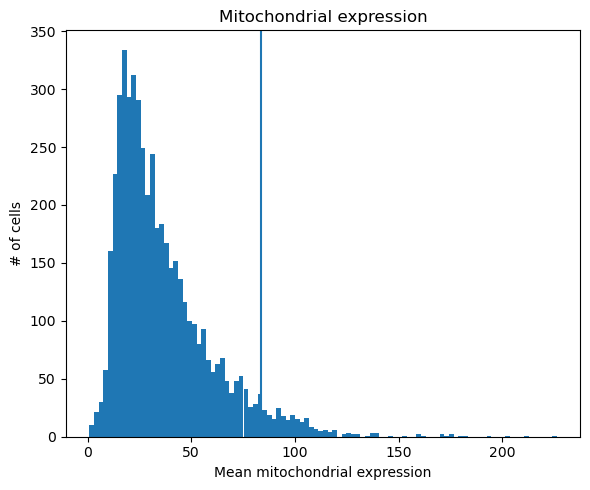

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# get mitochondrial genes
mitochondrial_gene_list = np.array([g.startswith('MT-') for g in clean_data.columns])

# get expression
mito_exp = clean_data.loc[:,mitochondrial_gene_list].mean(axis=1)

# plotting
fig, ax = plt.subplots(1, figsize=(6,5))

ax.hist(mito_exp, bins=100)
cutoff_value = float(np.percentile(mito_exp, 95))
ax.axvline(cutoff_value)
ax.set_xlabel('Mean mitochondrial expression')
ax.set_ylabel('# of cells')
ax.set_title('Mitochondrial expression')

fig.tight_layout()

In [26]:
# Check the first 10 gene names
print("First 10 genes:", clean_data.columns[:10].tolist())

# Check if any start with "MT-"
print("Count of 'MT-' genes:", clean_data.columns.str.startswith('MT-').sum())

# Check if any start with "mt-" (Mouse)
print("Count of 'mt-' genes:", clean_data.columns.str.startswith('mt-').sum())

First 10 genes: ['AL627309.1', 'AL627309.3', 'AL627309.4', 'AL669831.2', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.3', 'SAMD11']
Count of 'MT-' genes: 13
Count of 'mt-' genes: 0


In [27]:
data_mito_filtered = filter_high_mito_cells(clean_data)

data_mito_filtered.shape

[Filter Mito]  Cutoff: 0.0996
[Filter Mito]  Dropped 250 cells (Top 5% mitochondrial expr).


(4750, 21275)

In [28]:
normalized_data = normalize_by_library_size(data_mito_filtered)

normalized_data.shape

[Normalize]   Normalizing library size (CPM) with rescale=1e+06...


(4750, 21275)

In [29]:
logged_data = log_transform(normalized_data)

logged_data.shape

[Transform]   Applying log transform (log1+x)...


(4750, 21275)

In [30]:
logged_data.head()

,AL627309.1,AL627309.3,AL627309.4,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,...,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC233755.1,AC240274.1
0,,,,,,,,,,,,,,,,,,,,,
L1_AAACCCATCTTAAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
L1_AAAGGGCTCACTGATG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.160279,0.0,0.0,0.0,0.0,0.0
L1_AAATGGAGTTCAGCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
L1_AACACACTCGCCAACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
L1_AACCAACGTGTGTCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


/var/folders/yg/gln7v6491d5dgt0g56xdtn9w0000gn/T/ipykernel_5918/1457872429.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice.
  gene_variance = pd.Series(np.nanvar(data_array, axis=0), index=data.columns).fillna(0)
/var/folders/yg/gln7v6491d5dgt0g56xdtn9w0000gn/T/ipykernel_5918/1457872429.py:23: RuntimeWarning: Mean of empty slice
  gene_mean = pd.Series(np.nanmean(data_array, axis=0), index=data.columns).fillna(0)


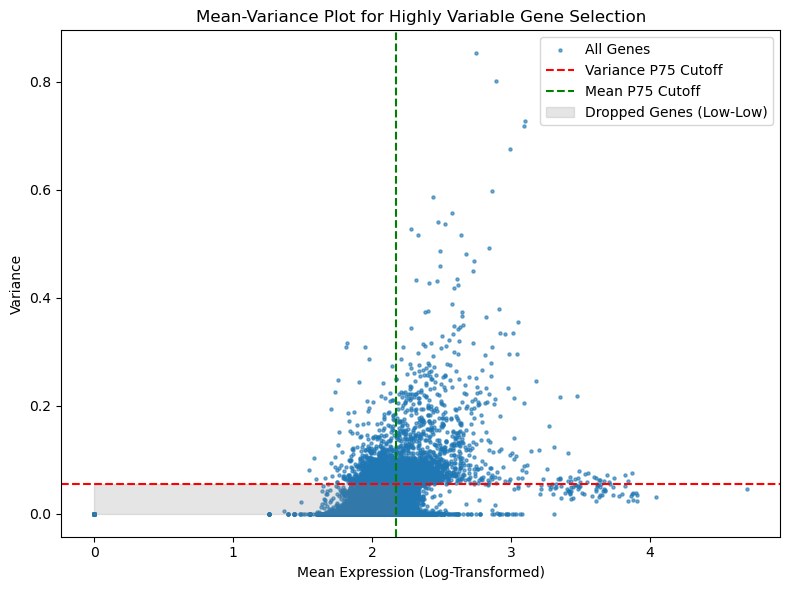


Default Mean Cutoff (P75): 2.1690
Default Variance Cutoff (P75): 0.0552


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Calculate Metrics on Non-Zero Cells ---
def calculate_hvg_metrics(data: pd.DataFrame):
    """Calculates non-zero mean and variance for each gene."""
    
    # Create a mask for non-zero values
    non_zero_mask = data > 0

    # Calculate variance and mean only where the gene is expressed
    # This replaces all original zeros with NaN
    non_zero_data = data.mask(~non_zero_mask)

    # --- FIX APPLIED HERE ---
    # Convert the masked DataFrame to a standard NumPy array to avoid SparseTypeError
    data_array = non_zero_data.values 

    # Use numpy.nanvar and numpy.nanmean to calculate statistics, which handles NaNs
    # Wrap results in a pandas Series to keep the gene names (columns) and fill NaNs with 0
    gene_variance = pd.Series(np.nanvar(data_array, axis=0), index=data.columns).fillna(0)
    gene_mean = pd.Series(np.nanmean(data_array, axis=0), index=data.columns).fillna(0)
    # --- END FIX ---

    # Combine into a single DataFrame for easy plotting and percentile calculation
    hvg_df = pd.DataFrame({
        'mean': gene_mean,
        'variance': gene_variance
    })
    return hvg_df

# Assuming 'log_transformed_data' is your data after normalization and log-transform
# Example: Let's use the data from the previous example, but expand it slightly
hvg_metrics = calculate_hvg_metrics(logged_data)


# --- 2. Calculate Percentile Cutoffs for Visualization ---
# Use the default 75th percentile
P_MEAN = 75
P_VAR = 75
mean_cutoff = float(np.percentile(hvg_metrics['mean'], P_MEAN))
var_cutoff = float(np.percentile(hvg_metrics['variance'], P_VAR))


# --- 3. Plot the Mean-Variance Relationship ---
fig, ax = plt.subplots(1, figsize=(8, 6))

# Scatter plot all genes
ax.scatter(hvg_metrics['mean'], hvg_metrics['variance'], s=5, alpha=0.6, label='All Genes')

# Highlight the cutoffs
ax.axhline(var_cutoff, color='red', linestyle='--', label=f'Variance P{P_VAR} Cutoff')
ax.axvline(mean_cutoff, color='green', linestyle='--', label=f'Mean P{P_MEAN} Cutoff')

# The "low-low" quadrant (Genes to be dropped)
ax.fill_between(
    [0, mean_cutoff], 0, var_cutoff,
    color='gray', alpha=0.2, label='Dropped Genes (Low-Low)'
)

ax.set_xlabel('Mean Expression (Log-Transformed)')
ax.set_ylabel('Variance')
ax.set_title('Mean-Variance Plot for Highly Variable Gene Selection')
ax.legend()
fig.tight_layout()
plt.show()

print(f"\nDefault Mean Cutoff (P{P_MEAN}): {mean_cutoff:.4f}")
print(f"Default Variance Cutoff (P{P_VAR}): {var_cutoff:.4f}")


In [34]:
final_data = filter_low_variance_and_mean_genes(logged_data)

final_data.shape

/Users/giannoskotsovilis/Documents/GitHub/Clustering-Benchmarking-scRNAseq/notebooks/../src/preprocessing.py:214: RuntimeWarning: Degrees of freedom <= 0 for slice.
  np.nanvar(data_array, axis=0), index=data.columns).fillna(0)
/Users/giannoskotsovilis/Documents/GitHub/Clustering-Benchmarking-scRNAseq/notebooks/../src/preprocessing.py:215: RuntimeWarning: Mean of empty slice
  gene_mean = pd.Series(np.nanmean(data_array, axis=0),


[Filter HVG] Variance Cutoff (P75): 0.0552
[Filter HVG] Mean Expression Cutoff (P75): 2.1690
[Filter HVG] Dropped 13200 genes (low variance AND low mean expression).


(4750, 8075)